<p style="text-align: center;"><img class="responsive" style="float: left;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="199" height="202" /><span style="font-family: verdana, geneva, sans-serif; font-size: 36pt;">Prévision de précipitations de pluie en France métropolitaine (2016 - 2018)</span></p>
<p style="text-align: center;">de Lucie Gabagnou, Armand L'Huillier, Yanis Rehoune et Ghiles Idris</p>



## Problématique

En début 2023, la crainte d'une sécheresse des nappes phréatiques en France souligne l'importance de prévoir précisément les précipitations. Les conséquences d'une mauvaise prédiction peuvent être graves, notamment des pénuries alimentaires, des inondations, une mauvaise gestion des ressources en eau et une propagation de maladies. Les prévisions météorologiques sont donc cruciales pour de nombreuses activités humaines, telles que l'agriculture, les transports et la gestion des ressources en eau.

Dans ce contexte, il est important de développer des modèles de prédiction précis pour améliorer la fiabilité des prévisions météorologiques. Pour ce projet de prévision, nous avons choisi de travailler à partir de données issues de Météo France, portant sur différents indicateurs mesurés sur une période d'étude de 2016-2018 et sur une majorité des stations météorologiques en France métropolitaine.

A ce stade, la problématique reste large et nous devons définir différents élements:
- Est-ce qu'on cherche à prédire de façon journalière, hebdomadaire, mensuelle, annuelle?
- Sur quel période on prédit? Sur toute une année? un mois? un jour?

Il s'agit de questions qui peuvent être répondues de différentes façons:
- métier: Prenons l'exemple des agriculteurs, la prévision la plus intéressante serait celle qui leur permettrait de planifier au mieux leurs cultures, de gérer efficacement les ressources en eau et de protéger leurs cultures contre les conditions climatiques extrêmes. En ce sens, une prévision à court-terme serait pertinente pour permettre de voir comment se protéger de conditions extrêmes (si une sécheresse est anticipée quelques jours/une semaine avant) mais également à long-terme pour organiser un plan de gestion de l'eau.
- les données: peut-être qu'il faut également voir la pertinence des prévisions à faire en fonction de la qualité des données: peut-être qu'il est plus facile de comprendre l'évolution future des précipitations en regardant sur l'ensemble du mois que sur un jour..


A l'issu de l'analyse exploratoire effectuée par la suite, notre problématique est de prédire les précipitations pour une semaine de façon journalière.




## Données

#### Description de la base de données: MeteoNet

MeteoNet, est un jeu de données proposé par Météo France dans le but de faciliter l'exploitation de données météorologiques par les Data Scientists. Ce jeu de données est accessible en ligne et contient des données d'archives de 3 ans, de 2016 à 2018, pour deux zones géographiques de 550 x 550 km sur le nord-ouest et le sud-est de la France. Il comprend:
- des images radar de précipitations
- des observations de 500 stations météorologiques
- des prévisions de modèles météorologiques 2D et 3D
- des masques terre/mer et relief



#### Description du jeu de données

Dans notre cas, nous nous intéresserons principalement aux observations des stations météorologiques. Voici une Overview de ce jeu de données à retrouver sur [MétéoNet](https://meteonet.umr-cnrm.fr/dataset/data/) (il faudra aller dans les répertoires NW/SE puis dans grounds_stations):
- NW2016
- NW2017
- NW2018
- SE2016
- SE2017
- SE2018

Il y a ainsi 6 sets de données qui contiennent comme l'indique leurs noms les données des stations météorologiques de 2016-2018 dans le Nord-Ouest et Sud-Est de la France. Chaque station météorologique recense différents indicateurs toutes les 6 minutes:

| Colonne | Description |
| --- | --- |
| number_sta | Identifiant unique de la station météorologique |
| lat | Latitude de la station |
| lon | Longitude de la station |
| height_sta | Hauteur de la station par rapport au niveau de la mer |
| date | Date et heure à laquelle les données ont été enregistrées (au format AAAAMMJJ HH:MM) |
| dd | Direction du vent (en degrés) |
| ff | Force du vent (en m/s) |
| precip | Quantité de précipitations (kg.m2) |
| hu | Humidité relative (en %) |
| td | Température du point de rosée (Kelvin (K)) |
| t | Température (Kelvin (K)) |
| psl | Pression au niveau de la mer (Pascal(Pa)) |

#### Création d'un jeu de données exploitable pour l'analyse 

**Remarque**:

- La base d'origine représente 16Go, soit environ 195 millions de lignes (en regroupant les 6 sets).

- Il s'agit d'un volume important donc nous proposons deux solutions pour accéder aux données:
    1) Vous pouvez runner le début du notebook en vous connectant à **AWS** comme indiqué par la suite ou bien télécharger vous-même les 6 sets sur le [site](https://meteonet.umr-cnrm.fr/dataset/data/) et les placer dans le repo **"data/raw"**
    2) Vous pouvez accéder aux résultats de l'étape de la première aggrégation en récupérant le fichier **"data.csv"** dans le [Drive](https://drive.google.com/file/d/1MCbUBo39btOu9SBlVZ6jN3sLgOPxTGV-/) et les placer dans **"data/intermediate"**
Dans tous les cas, il y a un échantillon de 1000 observations qui est placé par défaut lors de l'exécution du notebook ( **à enlever du dossier "data/raw"** si utilisation de la base d'origine)

In [1]:

# ##### Installation de l'environnement
import pandas as pd
import os 




In [2]:
os.chdir(os.path.dirname(os.getcwd()))


In [3]:
from scripts.extractor.database_builder import DaskDatabaseBuilder
from scripts.extractor.h3 import H3Processor


In [4]:
db_loader = DaskDatabaseBuilder()
db_loader.load_data("/data/raw")
db_loader.data.head(5)

number_sta    lat   lon  height_sta            date     dd   ff  precip  \
0    14066001  49.33 -0.43         2.0  20160101 00:00  210.0  4.4     0.0   
1    14126001  49.15  0.04       125.0  20160101 00:00    NaN  NaN     0.0   
2    14137001  49.18 -0.46        67.0  20160101 00:00  220.0  0.6     0.0   
3    14216001  48.93 -0.15       155.0  20160101 00:00  220.0  1.9     0.0   
4    14296001  48.80 -1.03       339.0  20160101 00:00    NaN  NaN     0.0   

     hu      td       t       psl  
0  91.0  278.45  279.85       NaN  
1  99.0  278.35  278.45       NaN  
2  92.0  276.45  277.65  102360.0  
3  95.0  278.25  278.95       NaN  
4   NaN     NaN  278.35       NaN




**Note**: Nous allons nous intéresser principalement à la pluie (precip) mais nous n'excluons pas d'utiliser les autres variables pour aider la prévision des précipitations.



##### Les stations météorologiques
Les stations météorologiques sont identifiées par un identifiant (ID) dans la colonne "number_sta". Cependant, cet ID n'est pas très informatif pour caractériser les stations, car il ne donne aucune indication sur la localisation, le département, etc. De plus, avec 862 stations, il est probable qu'il y ait des redondances entre les observations de certaines d'entre elles.

**Segmentation géographique H3**

En observant le graphique précédent, nous constatons que les stations météorologiques sont nombreuses et que certaines sont très proches les unes des autres. Une approche pertinente pour regrouper les stations pourrait être d'utiliser une méthode de segmentation géographique. Initialement, nous avions envisagé une segmentation par département, mais cela peut inclure des disparités entre les stations d'un même département, comme dans les Pyrénées-Atlantiques où le temps peut fluctuer entre la mer et la montagne.

De plus, si nous conservons le jeu de données tel quel, le nombre d'observations est très élevé. Il est donc pertinent d'opter pour une segmentation de type H3. H3 est un système d'indexation géospatial hiérarchique hexagonal open-source développé par Uber. Ce système permet de diviser la surface de la Terre en cellules hexagonales de différentes tailles, pouvant être utilisées pour l'indexation et la recherche spatiale. La taille des cellules hexagonales peut varier : on peut choisir une maille très fine (moins de 1 km² par cellule) ou une maille plus large pour englober un pays, par exemple.

Nous sélectionnons la taille de la maille en fonction de nos besoins, en cherchant un compromis entre le nombre de groupes formés et le nombre de stations par groupe. Dans ce contexte, une maille de taille 3 semble être un choix pertinent, comme le montre le graphique suivant.

A partir de cette segmentation, nous récupérons: les id, les id des hexagones voisins, les coordonnées géographiques (à retrouver dans le geojson).

##### Aggrégations selon les H3

Après avoir identifié un **regroupement** intéressant (h3) pour grouper les stations, il faut procéder à **l'aggrégation** pour chaque groupe au lieu de chaque station. Voici les étapes à suivre :
1) On récupère la moyenne pour chaque station et heure de chaque indicateur.
2) On fusionne avec le dataframe des stations (pour lequel on a récupéré les hex_ids).
3) On effectue ensuite l'aggrégation **par hex_ids et par heure** en calculant également la moyenne de chaque indicateur (pour les mêmes raisons que l'aggrégation par station).
4) On ajoute les **précipitations des H3 voisins pour chaque hex_ids et heure**

En appliquant cette méthode d'aggrégation selon les H3, on obtient un jeu de données plus compact et plus représentatif des variations géographiques. Cette approche permet d'éviter les redondances et les incohérences liées à la proximité des stations tout en offrant une vision claire de la répartition des données météorologiques.

In [5]:
db_loader.run()

h3_hex_id                date          dd        ff    precip  \
0        831840fffffffff 2016-01-01 00:00:00  140.000000  1.783333  0.000000   
1        831840fffffffff 2016-01-01 01:00:00  147.777778  3.122222  0.000000   
2        831840fffffffff 2016-01-01 02:00:00  147.272727  4.581818  0.000000   
3        831840fffffffff 2016-01-01 03:00:00  138.888889  5.955556  0.000000   
4        831840fffffffff 2016-01-01 04:00:00  158.181818  6.163636  0.036364   
...                  ...                 ...         ...       ...       ...   
1208439  83396efffffffff 2018-12-31 20:00:00  218.484848  3.421212  0.000000   
1208440  83396efffffffff 2018-12-31 21:00:00  165.925926  3.377778  0.000000   
1208441  83396efffffffff 2018-12-31 22:00:00  285.757576  3.872727  0.000000   
1208442  83396efffffffff 2018-12-31 23:00:00  322.592593  3.711111  0.000000   
1208443  83396efffffffff 2019-01-01 00:00:00  314.000000  3.086667  0.000000   

                hu          td           t            psl  \
0        85.333333  281.300000  283.633333  102240.000000   
1        80.666667  281.072222  284.283333  102212.222222   
2        78.272727  280.904545  284.550000  102146.363636   
3        81.555556  281.872222  284.938889  102094.444444   
4        84.727273  282.195455  284.695455  102030.909091   
...            ...         ...         ...            ...   
1208439  74.681818  277.672727  282.050000  102872.727273   
1208440  76.000000  277.083333  281.100000  102885.555556   
1208441  76.318182  276.277273  280.204545  102895.454545   
1208442  78.055556  276.144444  279.766667  102907.222222   
1208443  79.100000  275.950000  279.400000  102906.000000   

        h3_hex_id_neighbor_0 h3_hex_id_neighbor_1 h3_hex_id_neighbor_2  \
0            831844fffffffff      831841fffffffff      831843fffffffff   
1            831844fffffffff      831841fffffffff      831843fffffffff   
2            831844fffffffff      831841fffffffff      831843fffffffff   
3            831844fffffffff      831841fffffffff      831843fffffffff   
4            831844fffffffff      831841fffffffff      831843fffffffff   
...                      ...                  ...                  ...   
1208439      833963fffffffff      833961fffffffff      833945fffffffff   
1208440      833963fffffffff      833961fffffffff      833945fffffffff   
1208441      833963fffffffff      833961fffffffff      833945fffffffff   
1208442      833963fffffffff      833961fffffffff      833945fffffffff   
1208443      833963fffffffff      833961fffffffff      833945fffffffff   

         h3_hex_id_neighbor_0_precip  h3_hex_id_neighbor_1_precip  \
0                                0.0                     0.000000   
1                                0.0                     0.000000   
2                                0.0                     0.000000   
3                                0.0                     0.000000   
4                                0.0                     0.000957   
...                              ...                          ...   
1208439                          0.0                     0.000000   
1208440                          0.0                     0.000000   
1208441                          0.0                     0.000000   
1208442                          0.0                     0.000000   
1208443                          0.0                     0.000000   

         h3_hex_id_neighbor_2_precip  
0                           0.000000  
1                           0.000000  
2                           0.009259  
3                           0.009259  
4                           0.010606  
...                              ...  
1208439                     0.000000  
1208440                     0.000000  
1208441                     0.000000  
1208442                     0.000000  
1208443                     0.000000  

[1208444 rows x 15 columns]

In [6]:
h3_processor=H3Processor(3)
h3_processor.plot_hexagons_on_mapbox(db_loader.stations, color='red')


In [7]:
h3_processor.hex_size=4
h3_processor.plot_hexagons_on_mapbox(db_loader.stations, color='red')


In [8]:
#Finalement, on conserve une maille de 3
h3_processor.hex_size=3
stations=h3_processor.get_h3_components(db_loader.stations)
stations.head(1)
#On exporte sous forme de geoJson les H3_ids et leurs coordonnées GPS dans la fonction 
#h3_processor.get_geojson_from_h3(db_loader.stations)

number_sta    lat   lon  height_sta        h3_hex_id  \
0    14066001  49.33 -0.43         2.0  831860fffffffff   

                                  h3_hex_id_neighbor  \
0  [831866fffffffff, 831864fffffffff, 831863fffff...   

                                            geometry h3_hex_id_neighbor_0  \
0  {'type': 'Polygon', 'coordinates': [((-1.17756...      831866fffffffff   

  h3_hex_id_neighbor_1 h3_hex_id_neighbor_2  
0      831864fffffffff      831863fffffffff

In [9]:
db_loader.preprocessed_data.head(5)

h3_hex_id                date          dd        ff    precip  \
0  831840fffffffff 2016-01-01 00:00:00  140.000000  1.783333  0.000000   
1  831840fffffffff 2016-01-01 01:00:00  147.777778  3.122222  0.000000   
2  831840fffffffff 2016-01-01 02:00:00  147.272727  4.581818  0.000000   
3  831840fffffffff 2016-01-01 03:00:00  138.888889  5.955556  0.000000   
4  831840fffffffff 2016-01-01 04:00:00  158.181818  6.163636  0.036364   

          hu          td           t            psl h3_hex_id_neighbor_0  \
0  85.333333  281.300000  283.633333  102240.000000      831844fffffffff   
1  80.666667  281.072222  284.283333  102212.222222      831844fffffffff   
2  78.272727  280.904545  284.550000  102146.363636      831844fffffffff   
3  81.555556  281.872222  284.938889  102094.444444      831844fffffffff   
4  84.727273  282.195455  284.695455  102030.909091      831844fffffffff   

  h3_hex_id_neighbor_1 h3_hex_id_neighbor_2  h3_hex_id_neighbor_0_precip  \
0      831841fffffffff      831843fffffffff                          0.0   
1      831841fffffffff      831843fffffffff                          0.0   
2      831841fffffffff      831843fffffffff                          0.0   
3      831841fffffffff      831843fffffffff                          0.0   
4      831841fffffffff      831843fffffffff                          0.0   

   h3_hex_id_neighbor_1_precip  h3_hex_id_neighbor_2_precip  
0                     0.000000                     0.000000  
1                     0.000000                     0.000000  
2                     0.000000                     0.009259  
3                     0.000000                     0.009259  
4                     0.000957                     0.010606

In [10]:
#On export les résultats
#db_loader.export_data("data/intermediate/data.csv")

## Exploration des données

Cette exploration se concentre sur l'aspect temporelle des séries. Le but est de faire des hypothèses sur les données, de sorte à avoir une modélisation adaptée aux données.

In [11]:
#Récupération  des données pré-traitées 
data = pd.read_csv("data/intermediate/data.csv")

### Overview

#### Etude univariée: série des précipitations

In [12]:
from scripts.plotter.overview import WeatherVisualizations

En analysant les données de précipitation pour chaque hexagone à différentes fréquences (journalière, hebdomadaire, mensuelle et annuelle) sur la période 2016-2019, nous avons constaté certaines tendances intéressantes.

La série journalière montre des variations extrêmes, en particulier entre juillet 2016 et janvier 2017, pour un hexagone en particulier. Cependant, de manière générale, les précipitations des hexagones évoluent ensemble avec une amplitude assez similaire. Cela suggère qu'un modèle unique pourrait être suffisant pour l'ensemble des hexagones.

En examinant les données agrégées par semaine, nous observons des épisodes de pluie encore plus homogènes.

En analysant les données à une fréquence mensuelle, nous avons également observé des irrégularités, mais globalement, les tendances restent assez similaires à celles observées à une fréquence hebdomadaire.

À une fréquence annuelle, nous avons constaté que les précipitations varient d'une année à l'autre en moyenne. Cela suggère qu'une prévision pour une année donnée ne sera pas particulièrement corrélée avec les précipitations de l'année précédente dans leur ensemble. Cela est logique car l'échelle d'observation ne permet pas de conserver suffisamment d'informations pour des prévisions précises à long terme.

In [13]:
data_for_data_viz=data
data_for_data_viz["date"] = pd.to_datetime(data_for_data_viz["date"])
viz = WeatherVisualizations(data_for_data_viz)
viz.create_frequency_subplots(["precip"],all=False)

##### Focus sur une année
Quid si on zoome sur une année comme 2016?

In [14]:
data_2016 = data_for_data_viz.loc[data_for_data_viz["date"].dt.year < 2017]
viz_2016 = WeatherVisualizations(data_2016)
viz_2016.plot_data("jour",["precip"])


##### Aggrégation par date (hexagones confondus)


In [15]:
data_2016 = data_for_data_viz.loc[data_for_data_viz["date"].dt.year < 2017]
viz_2016 = WeatherVisualizations(data_2016)
viz_2016.plot_data("jour",["precip"],all=True)


#### Etude multivariée: étude des relations avec les autres indicateurs

In [16]:
WeatherVisualizations(data).plot_correlation_heatmap()

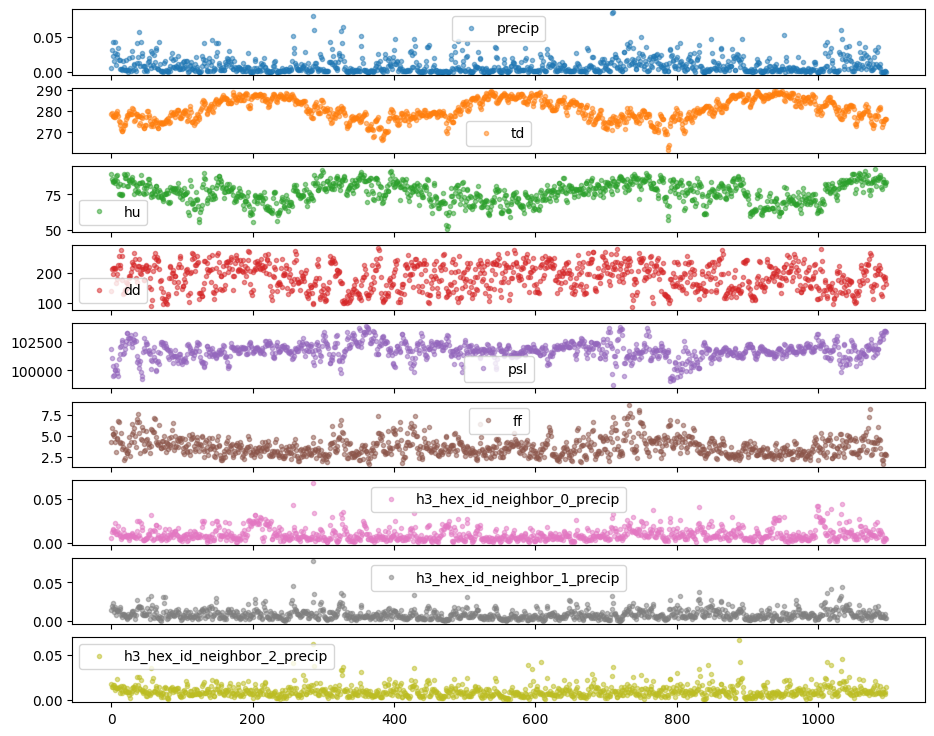

In [17]:
WeatherVisualizations(data).plot_indicators()

## Preprocessing et feature engineering

Dans l'analyse effectuée, les données météorologiques brutes sont transformées en un format plus adapté pour l'analyse ou l'entraînement de modèles de machine learning. Les étapes de prétraitement et d'agrégation des données sont les suivantes :

1) Agrégation des données par jour : Les données météorologiques sont agrégées sur une base quotidienne pour chaque hexagone H3. Cela permet de réduire la granularité temporelle des données, ce qui simplifie l'analyse et réduit la complexité du modèle. De plus, les variations météorologiques à court terme peuvent être moins pertinentes pour certaines applications, tandis que les tendances quotidiennes sont souvent plus informatives (on était parti de ce constat pour l'analyse descriptive).

2) Imputation des valeurs manquantes : Les valeurs manquantes dans les données agrégées sont imputées en utilisant la méthode "bfill" (backward fill), qui remplit les valeurs manquantes avec la valeur précédente valide dans la colonne. Cette approche permet de conserver la continuité temporelle des données et d'éviter les problèmes liés aux valeurs manquantes lors de l'analyse ou de l'entraînement de modèles. Nous avons également supprimé "psl" qui comporte pas mal de valeurs manquantes (fastidieuses à imputer)

| Variable                   | % de données manquantes |
|----------------------------|-------------------------|
| h3_hex_id                  | 0.000 %                 |
| date                       | 0.000 %                 |
| dd                         | 0.184 %                 |
| ff                         | 0.158 %                 |
| precip                     | 0.014 %                 |
| hu                         | 0.033 %                 |
| td                         | 0.048 %                 |
| t                          | 0.024 %                 |
| psl                        | 9.223 %                 |
| h3_hex_id_neighbor_0_precip| 0.002 %                 |
| h3_hex_id_neighbor_1_precip| 0.002 %                 |
| h3_hex_id_neighbor_2_precip| 0.000 %                 |


Les choix de prétraitement et d'agrégation des données sont justifiés par leur capacité à simplifier l'analyse, à réduire la complexité du modèle et à capturer les tendances importantes des données météorologiques. Ces étapes permettent de préparer les données de manière à faciliter leur utilisation pour l'analyse et l'entraînement de modèles de machine learning.


In [18]:
selected_columns=['h3_hex_id', 'date', 'dd', 'ff', 'precip', 'hu', 'td', 't', 'h3_hex_id_neighbor_0_precip', 'h3_hex_id_neighbor_1_precip', 'h3_hex_id_neighbor_2_precip']
print("Colonnes pour l'analyse:",selected_columns)

Colonnes pour l'analyse: ['h3_hex_id', 'date', 'dd', 'ff', 'precip', 'hu', 'td', 't', 'h3_hex_id_neighbor_0_precip', 'h3_hex_id_neighbor_1_precip', 'h3_hex_id_neighbor_2_precip']


In [20]:
#Execution de la pipeline
from scripts.processor.feature_processor import FeaturesConstructor
features_constructor = FeaturesConstructor()
processed_data = features_constructor.run(data,post_ts=False)


## Modélisation

In [22]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Precipitations_forecasting")
mlflow.tensorflow.autolog()
mlflow.statsmodels.autolog()

Dans cette partie, nous évoquons les différents modèles effectués ainsi que leurs performances. 

**Comment sont évalués les modèles?**

- **Série étudiée**: La modélisation se fait par hexagone puisqu'il semble à ce stade intéressant de réaliser un modèle de cette façon:  les séries n'ont pas les mêmes retards significatifs forcément, l'impact des variables exogènes est hétérogène: typiquement la température (laggée de 1) peut s'avérer pertinente pour prédire la pluie dans certaines régions mais ca serait moins le cas pour d'autres . En effet, si on aggrège les modèles (comme un BMA typiquement ou toute autre méthode ensembliste plus connue), nous perdons en informations. Potentiellement, s'il y avait plus d'hexagones, on pourrait tenter une approche d'aggrégation de modèles.

- **Métrique**: Dans cette partie, nous avons décidé de nous focaliser sur une métrique comme la MAE pour évaluer notre modèle.Effectivement, les précipitations peuvent atteindre des niveaux très faibles et également très haut. Le choix de la MAE permet de corriger la prévision de ces valeurs extrêmes. Nous regarderons d'autres métriques si possibles pour comparer.





In [55]:
#On choisit au hasard un hex_id à étudier
import random
chosen_hex_id = random.choice(data['h3_hex_id'].unique())
print("Hex id sélectionné:",chosen_hex_id)

Hex id sélectionné: 831860fffffffff


### Modèle statistique

In [24]:
from scripts.plotter.timeseries import TimeSeriesPlots
from scripts.timeseries import get_stationarity_results

In [56]:
data_for_time_series = FeaturesConstructor().run(data,post_ts=False) #post_ts = False car preprocessing peut être effectué après analyse en série temporelle (nouveaux features..)

On va se focaliser sur une série de telle sorte à avoir une idée pour un hexagone. On généralisera si besoin.

In [26]:
selected_hex_id="831eb3fffffffff"
data_for_time_series=data_for_time_series[data_for_time_series['h3_hex_id'] == selected_hex_id]

##### Auto-Corrélogrammes

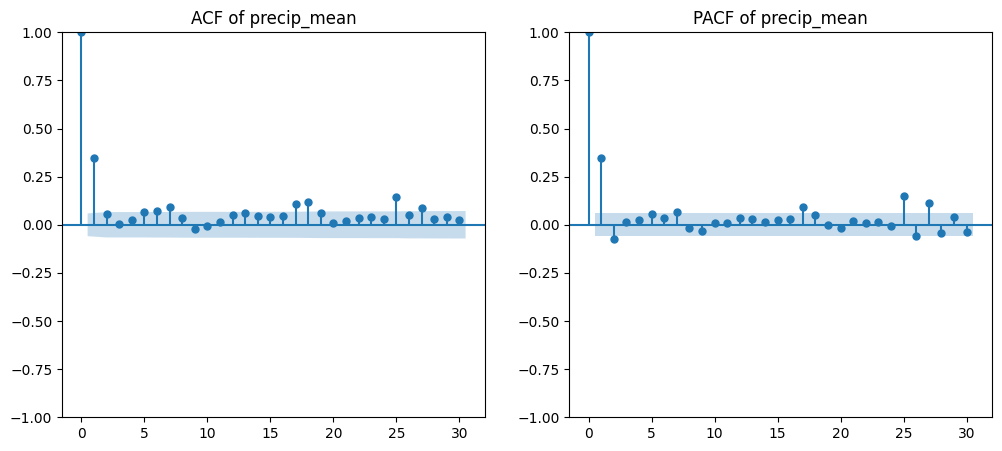

In [27]:
ts = data_for_time_series.set_index('date')["precip_mean"]
time_series_plots = TimeSeriesPlots(ts)
time_series_plots.show_acf_pacf()


On peut observer en prenant 3 hexagones au hasard, que les corrélations entre retards, sont assez différentes. Le point commun est que les retards sont corrélés à l'observation t. Par contre, les ordres des retards sont différents : Avec la significativité des pvalue, on imagine tantot des processus AR(1), tantot des AR(3)... Les hexagones ont des séries bien distinctes en terme de structure de retards.

En finalité, si seulement quelques retards sont significatifs, alors on peut penser que la série est peu persistante, elle a une mémoire à court terme.


##### Tests de stationnarité

In [33]:
get_stationarity_results(data_for_time_series)

2023/04/21 17:38:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7b7d59bd75944a62a5677a1d6031a771', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 17:38:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f13eca8798e249e29a10a3051a99e5c8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 17:38:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '43f724e805f74f299b6d29cbd107ab18', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 17:38:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b27adf7a1e024c62b6b56f592c07a03c', which will track hyperparameters, performance metrics, model artifacts, a

Test     Variable Regression  p-value  Lags Used      Résultat
1   ADF  precip_mean          n      0.0         17  Stationnaire
0  KPSS  precip_mean          c      0.1          8  Stationnaire

La quasi totalité des tests concluent que les séries sont stationnaires. On peut alors décider d'appliquer des modèles statistiques sur ces séries, sans avoir besoin de les différencier.

In [37]:
time_series_plots=TimeSeriesPlots(ts)
time_series_plots.plot_stl_decomposition(period=365)

On observe :
- qu'il existe une **tendance** : elle est très faible et constante. Donc on peut s'attendre à avoir une constante dans nos modèles *ARIMA, AR*...
- qu'il existe des *outliers*, même en retirant un effet de saisonnalité. 
-> ces outliers pourraient biaiser le modèle : on a essayé de les lisser avec la fonction *Logarithme* : mais cela à totalement bouleversé la série, le processus *AR(p)* est devenu un *MA(q)*. On préfère rester comme ça avec ces outliers faute de mieux.
- les résidus ont une **variance forte** dans les périodes pluvieuses (pendant la basse saison)


##### ARIMA

On décide d'utiliser les modèles **ARIMA**. On peut introduire des coefficients de saisonnalité (*SARIMA*), introduire des variables exogènes (*ARIMAX*).
On lance un *auto-ARIMA* (librairie `pmdarima`): Il va identifier les ordres optimaux pour l'ARIMA (p, q, d) et en plus on regarde s'il existe une saisonnalité avec le paramètre D (Ordres de retards pour la saisonnalité):
```python
from pmdarima import auto_arima
arima = auto_arima(data_for_time_series["precip_mean"],
                       start_P=1,
                       start_q=1,
                       max_p=10,
                       max_q=10,
                       m=30,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
arima.summary()
```



**Conclusion de l'auto-arima** :
- *SARIMA* ne convient pas à des données journalières : il faut plutôt avoir du one-hot encoding réalisé par nos soins pour détecter de la saisonnalité par mois.
- les données suivent un processus *AR(p)*. Pas de *MA(q)*. Pas de coefficient d'intégration (d)... Rien qu'avec le fait que la série soit stationnaire, on se doutait bien qu'il n'était pas nécessaire d'appliquer une intégration dans le processus. Maintenant on a la confirmation.
  




##### Variante: SARIMAX
Le SARIMAX Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) est un modèle de prévision de séries temporelles qui combine les concepts d'ARIMA, de saisonnalité et de variables exogènes.

Les principales composantes du modèle sont:

AR (AutoRégression) : dépendance entre une observation et des observations précédentes.
I (Intégré) : rend la série temporelle stationnaire par différenciation.
MA (Moyenne Mobile) : dépendance entre une observation et une erreur résiduelle d'un modèle de moyenne mobile.
Il existe plusieurs ordres qui déterminent la structure du modèle:
- Order (p, d, q) : composantes non saisonnières (ARIMA)
- Seasonal_order (P, D, Q, s) : composantes saisonnières
- Variables exogènes (optionnelles) : variables externes qui influencent la variable endogène (variable à prévoir) sans être influencées par celle-ci.

Une première approche consistait à effectuer un modèle proposé par statsmodels. Finalement nous avons confectionné le modèle pour avoir davantage de contrôle sur la création du modèle
```python
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  #Saisonnalité mensuelle
y=data_for_time_series["precip_mean"]
x=data_for_time_series["precip_mean"].drop(columns=["precip_mean"])
model = SARIMAX(y, exog=x, order=order, seasonal_order=seasonal_order)
results = model.fit()
```


##### Conclusion

Après avoir étudié plus en profondeur les séries temporelles, nous effectuons différentes opérations:
1) **Ajout de colonnes pour la saison et les mois** : Des colonnes supplémentaires sont ajoutées pour indiquer la saison (haute ou basse) et les mois sous forme de one-hot encoding. La saisonnalité est un aspect important des données météorologiques et peut avoir un impact significatif sur d'autres variables d'intérêt. L'encodage one-hot des mois permet de capturer les variations saisonnières sans introduire d'ordre arbitraire entre les mois.
2) **Ajout de variables retardées**: On extrait tout de même des retards

Ce traitement est réalisé dans la classe **FeaturesConstructor** avec l'option "post_ts"=True

#### Implémentation du SARIMAX



In [57]:
from scripts.modeler.dataset import MLDataSet
from scripts.modeler.sarimax import SARIMAXCustomModel


Pour la modélisation, un échantillon de données est créé en extrayant les données associées à un élément aléatoire. Cet échantillon de données est préparé en utilisant la classe "MLDataSet". Les données sont ensuite divisées en ensembles d'entraînement et de test pour l'évaluation de la performance du modèle. 
Contrairement à une tâche de Machine Learning classique, ici, nous n'utilisons pas d'échantillons de test ni de validation car il s'agit davantage d'un modèle statistique classique qu'un modèle de Machine Learning (il ne nécessite pas d'optimiser des hyperparamètres typiquement). Notre échantillon de "test" est constitué de 7 observations (les 7 dernières) pour lesquelles on fait une prédiction OOS (Out of sample).

Remarque: par soucis de comparaison avec le Deep Learning, nous constituons le même échantillon dans la partie Deep Learning (mais cette fois-ci en prenant les 7 dernières observations).







##### Préparation des données

In [58]:
# preprocessing 
timeseries_data_builder = FeaturesConstructor()
data_for_arima = timeseries_data_builder.run(data,post_ts=True,nb_lag_var=5,nb_lag_exo=5) #post_ts = False car preprocessing peut être effectué après analyse en série temporelle (nouveaux features..)
#Restreint l'analyse à un hex_id
data_for_arima_sample = data_for_arima[data_for_arima['h3_hex_id'] == chosen_hex_id] 
# Préparer les données pour la modélisation 
timeseries_dataset = MLDataSet(data_for_arima_sample, timeseries_data_builder.instances,timeseries_data_builder.y)
X_train, X_test,y_train,y_test = timeseries_dataset.prepare_data()

Échantillons d'entraînement: 1090
Échantillons de test: 7


##### Entraînement

In [59]:
predicted_y_init = y_train.iloc[-1]
sarimax_model = SARIMAXCustomModel()
sarimax_model.train(X_train,y_train)

2023/04/21 18:14:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eea3916e09cd495687bb6d397a1e7806', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 18:14:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0b57942542284266b7ac5f2e26086847', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 18:14:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '57a1dfddc4b845828dc0475ffd27f0b9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2023/04/21 18:14:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8012f38882d0442f988a06307d709d87', which will track hyperparameters, performance metrics, model artifacts, a

##### Inférence

In [60]:
predictions = sarimax_model.predict_test_OOS(X_test, y_test, predicted_y_init)

In [61]:
import numpy as np
sarimax_model.plot_results(y_test,np.array(predictions.precip_mean_predicted),"Pluviométrie OOS de l'ARIMA sur 7 jours")

Toutes ces étapes peuvent être réalisées avec la méthode "run":

In [258]:
hexagones = list(data_for_arima['h3_hex_id'].unique())
sarimax_model.run(data_for_arima,hexagones)
sarimax_model.save_model()

AttributeError: 'SARIMAXCustomModel' object has no attribute 'y'

## LSTM

Du fait des performances pas particulièrement bonnes sur le premier modèle, nous avons souhaité challenger ce modèle avec un modèle LSTM. Un LSTM (Long Short-Term Memory) est un type de réseau de neurones récurrent (RNN) particulièrement adapté à la modélisation de séquences temporelles. En ce sens, comme nous étudions des patterns de 7 jours conséquents, il est probable qu'il s'agisse d'un modèle adapté. 

##### Préparation des données


In [138]:
features_constructor = FeaturesConstructor()
data_for_deep = features_constructor.run(data,True,5,5)
single_data=data_for_deep[data_for_deep["h3_hex_id"]==chosen_hex_id]
single_data.drop(columns=["h3_hex_id"],inplace=True)
single_data.set_index("date",inplace=True)

Les LSTM nécessitent un traitement plus complexe de la donnée. Effectivement, il faut préparer les données de sorte à avoir des séquences de taille 7. Ainsi effectuons différentes opérations de reshaping via la fonction prepare_data de la classe LSTMModel.

Pour ce modèle de Deep Learning, nous avons séparé le jeu d'apprentissage en train et validation pour l'optimisation des hyperparamètres (et éviter l'overfitting).

In [279]:
import tensorflow as tf
from scripts.modeler.lstm import LSTMModel
target_column = 'precip_mean'
time_steps = 7
lstm_model = LSTMModel(single_data, target_column, time_steps)

# Préparez les données en les restructurant en format 3D et en les divisant en variables d'entrée et de sortie
X, y = lstm_model.prepare_data()
end_train_date = single_data.index.max() + pd.DateOffset(days=-7)
end_train_index = single_data[single_data.index <= end_train_date].shape[0]-7
X_train, X_test, y_train, y_test = lstm_model.train_test_split(X, y,end_train_index)
X_train,X_valid,y_train,y_valid = lstm_model.train_test_split(X_train,y_train,0.8)

Échantillons d'entraînement: 1083
Échantillons de test: 7
Échantillons d'entraînement: 866
Échantillons de test: 217


##### Entraînement

- Simplicité: Nous avons souhaité commencer par un modèle simple pour voir les résultats 
- Recherche d'hyperparamètres/paramètres: Nous avons été par tatônnement pour sélectionner le nombre de neurones pour la couche principale. Il en est de même pour le learning rate, les fonctions d'activation également,etc...
- Il s'agit d'une recherche basique mais il aurait été possible de mettre en place un GridSearch, et également de tester la robustesse des hyperparamètres.
- Nombre d'epochs: déterminé graphiquement à partir de MLFlow, on regarde simplement un nombre d'epochs tel que la loss soit la plus faible sur l'échantillon de validation et n'augmente pas davantage

- Structure du réseau:
    - Couche LSTM avec un nombre de neurone choisi par tatonnement
    - Couche entièrement connectée utilisant une fonction d'activation "tanh". Cette fonction est particulièrement adapté aux LSTMs. En effet, car elle permet de capturer les relations non linéaires dans les données tout en maintenant des gradients stables lors de la rétropropagation.
    - Fonction de perte: Mean squared error car il s'agit d'une fonction classique dans les modèles de régression


In [280]:
lstm_model.train(X_train, y_train,X_valid,y_valid, epochs=100,units=100,verbose=2,activation="tanh", loss="mse")

2023/04/21 20:17:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dc3a24a7898f4975a596a252336157c4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100


2023-04-21 20:17:02.136937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:17:02.314543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:17:02.497827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:17:03.322863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:17:03.369456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 - 2s - loss: 0.0220 - val_loss: 0.0033 - 2s/epoch - 73ms/step
Epoch 2/100
28/28 - 0s - loss: 0.0017 - val_loss: 6.8138e-04 - 290ms/epoch - 10ms/step
Epoch 3/100
28/28 - 0s - loss: 4.6981e-04 - val_loss: 4.0855e-04 - 246ms/epoch - 9ms/step
Epoch 4/100
28/28 - 0s - loss: 3.3903e-04 - val_loss: 3.9090e-04 - 223ms/epoch - 8ms/step
Epoch 5/100
28/28 - 0s - loss: 3.1364e-04 - val_loss: 3.5221e-04 - 247ms/epoch - 9ms/step
Epoch 6/100
28/28 - 0s - loss: 3.0476e-04 - val_loss: 3.3094e-04 - 242ms/epoch - 9ms/step
Epoch 7/100
28/28 - 0s - loss: 3.0408e-04 - val_loss: 3.4405e-04 - 233ms/epoch - 8ms/step
Epoch 8/100
28/28 - 0s - loss: 3.3078e-04 - val_loss: 3.1619e-04 - 237ms/epoch - 8ms/step
Epoch 9/100
28/28 - 0s - loss: 2.9947e-04 - val_loss: 3.1770e-04 - 225ms/epoch - 8ms/step
Epoch 10/100
28/28 - 0s - loss: 3.0033e-04 - val_loss: 3.0775e-04 - 228ms/epoch - 8ms/step
Epoch 11/100
28/28 - 0s - loss: 3.0654e-04 - val_loss: 3.1050e-04 - 248ms/epoch - 9ms/step
Epoch 12/100
28/28 - 0s - loss: 2

2023-04-21 20:17:27.292967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:17:27.339329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /var/folders/wc/46qsbhjx40lf12wjbnjcyx680000gn/T/tmpou7y60s4/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/wc/46qsbhjx40lf12wjbnjcyx680000gn/T/tmpou7y60s4/model/data/model/assets


##### Inférence

In [281]:
predicted_data = lstm_model.predict_OOS(X_test)
print("Prédictions dynamiques sur 7 jours :", predictions)

1/1 [==============================] - 0s 11ms/step
Prédictions dynamiques sur 7 jours :             precip_mean_predicted
Date                             
2018-12-26               0.012396
2018-12-27               0.044163
2018-12-28               0.031026
2018-12-29               0.005849
2018-12-30               0.031089
2018-12-31               0.071996
2019-01-01               0.071115


In [282]:
lstm_model.plot_results(y_test,predicted_data,"Pluviométrie à 7 jours selon LSTM")

Toutes ces étapes peuvent être réalisées avec la méthode "run":

In [284]:
hexagones = list(data['h3_hex_id'].unique())
lstm_model.run(data_for_deep,hexagones,units=100)
lstm_model.save_models()

Échantillons d'entraînement: 1078
Échantillons de test: 7
Échantillons d'entraînement: 862
Échantillons de test: 216


2023/04/21 20:22:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5549b92ff34843158cfc41de013fa945', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/50


2023-04-21 20:22:28.832133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-21 20:22:31.383938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 - 3s - loss: 3262.0112 - val_loss: 3.4911e-04 - 3s/epoch - 121ms/step
Epoch 2/50
27/27 - 2s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 2s/epoch - 56ms/step
Epoch 3/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 54ms/step
Epoch 4/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 54ms/step
Epoch 5/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 53ms/step
Epoch 6/50
27/27 - 2s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 2s/epoch - 59ms/step
Epoch 7/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 55ms/step
Epoch 8/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 53ms/step
Epoch 9/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 53ms/step
Epoch 10/50
27/27 - 1s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 1s/epoch - 55ms/step
Epoch 11/50
27/27 - 2s - loss: 2.2059e-04 - val_loss: 3.4911e-04 - 2s/epoch - 57ms/step
Epoch 12/50
27/27 - 2s - loss: 2.2059e-04 - val_loss

2023-04-21 20:23:43.935381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /var/folders/wc/46qsbhjx40lf12wjbnjcyx680000gn/T/tmpfbrt3vm6/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/wc/46qsbhjx40lf12wjbnjcyx680000gn/T/tmpfbrt3vm6/model/data/model/assets


1/1 [==============================] - 0s 18ms/step


### Conclusion

Finalement, on voit que la prédiction sur 7 jours pour un hexagone donné, semble meilleure avec un modèle SARIMAX. Effectivement, on voit que la MAE est largement plus faible et les prédictions suivent davantage les évolutions des précipitations. 
Limites:
- L'analyse est faite uniquement pour un hexagone donné: Cela est à la fois intéressant car on donne une information précise à l'échelle d'une zone géographique particulière. Toutefois, nous pouvons voir que le fait de ne pas agréger ne permet pas de conclure à une performance globale des modèles: SARIMAX pourrait s'avérer meilleur pour un hexagone et LSTM meilleur pour un autre.
- Les performances ne sont pas forcément pertinentes, et ce même avec SARIMAX: les écarts de prédictions absolus restent relativement élevés au vue de l'échelle de la variable. Les prévisions ne sont donc pas précises: on voit que les vraies valeurs tournent autour de 0.001 donc une erreur de 0.005 s'avère être très grande. Tout dépend de l'échelle choisie.

Améliorations:
- Utilisation d'autres modèles
- Les données ne sont pas forcément qualitatives pour faire de la prévision à la semaine: peut-être il aurait fallu faire une prévision mensuelle avec les données dont on disposait. L'aggrégation par heure aurait été une meilleure option mais n'était pas supportable en termes de volumétrie:on ne pouvait pas faire une prévision locale et horaire à la fois. 